# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Eva Yuliana
- **Email:** aevayuli1807@gmail.com
- **ID Dicoding:** MC129D5X0177

## Menentukan Pertanyaan Bisnis

1. Apa faktor utama yang mempengaruhi jumlah penyewaan sepeda?
2. Bagaimana tren penggunaan sepeda dalam sehari? Kapan jam tersibuk?

## Import Semua Packages/Library yang Digunakan

In [2]:
# Import Semua Packages/Library yang Digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
# Gathering Data
day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')

**Insight:**
- Dataset day.csv berisi informasi penyewaan sepeda per hari.
- Dataset hour.csv mencatat data penyewaan sepeda setiap jam.
- Dengan dua dataset ini, kita bisa membandingkan tren harian dan jam-jam sibuk dalam penyewaan sepeda.


### Assessing Data

In [4]:
# Assessing Data
print(day_df.info())
print(hour_df.info())
print(day_df.head())
print(hour_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

**Insight:**
- .info() membantu melihat tipe data di setiap kolom dan apakah ada data yang hilang.
- .head() memberikan gambaran awal tentang struktur dataset.
- Dari tahap ini, kita dapat memahami apakah ada kolom yang perlu dikonversi, dihapus, atau diperbaiki.


### Cleaning Data

In [5]:
# Cleaning Data
# Mengecek missing values
day_df.dropna(inplace=True)
hour_df.dropna(inplace=True)

# Mengecek data duplikat
print(f'Duplikan di day.csv: {day_df.duplicated().sum()}')
print(f'Duplikan di hour.csv: {hour_df.duplicated().sum()}')

Duplikan di day.csv: 0
Duplikan di hour.csv: 0


**Insight:**
- Menghapus nilai yang hilang (missing values) menggunakan .dropna().
- Mengecek duplikasi untuk memastikan tidak ada data yang berulang secara tidak wajar.
- Data yang bersih akan membantu mencegah kesalahan dalam analisis selanjutnya.

## Exploratory Data Analysis (EDA)

### Explore ...

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

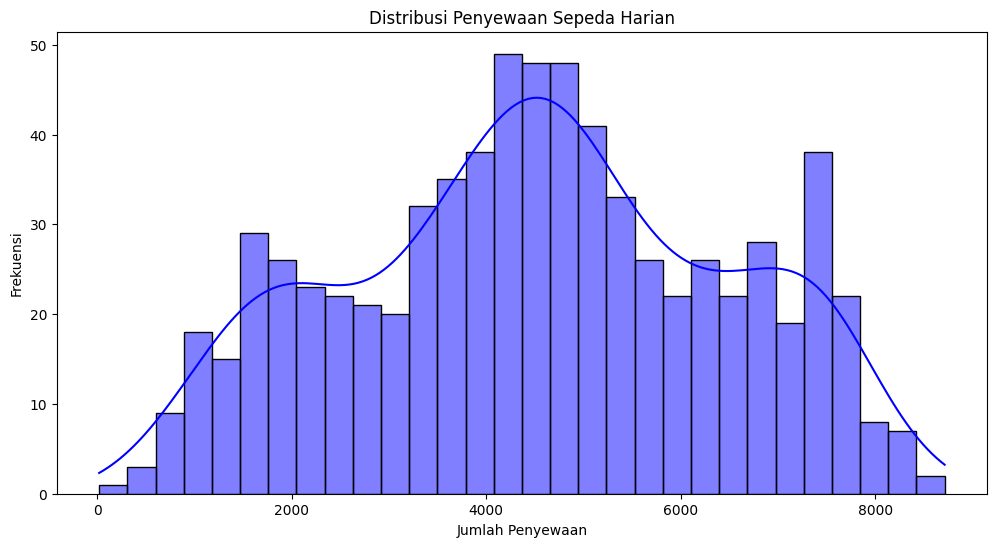

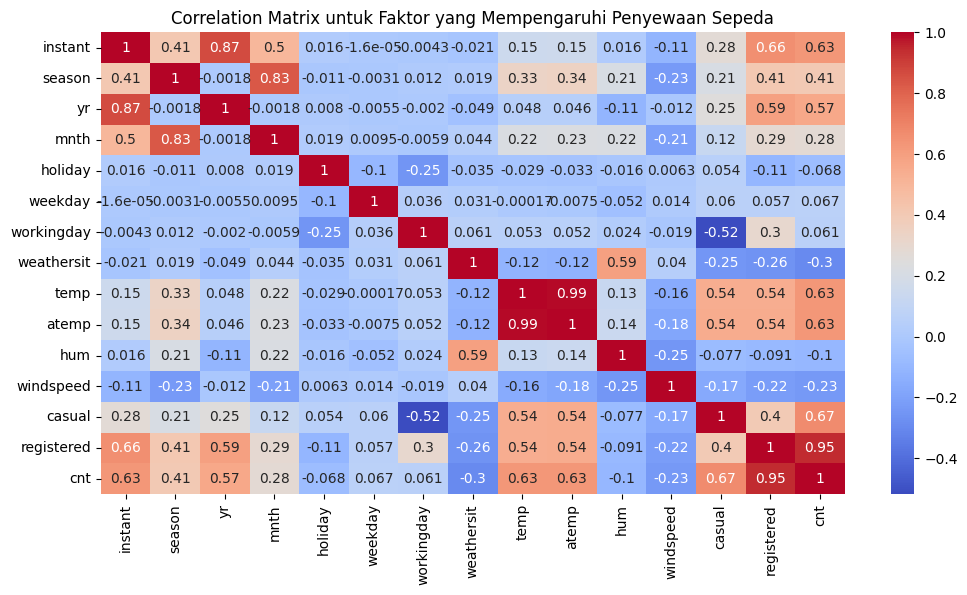

<Figure size 1200x600 with 0 Axes>

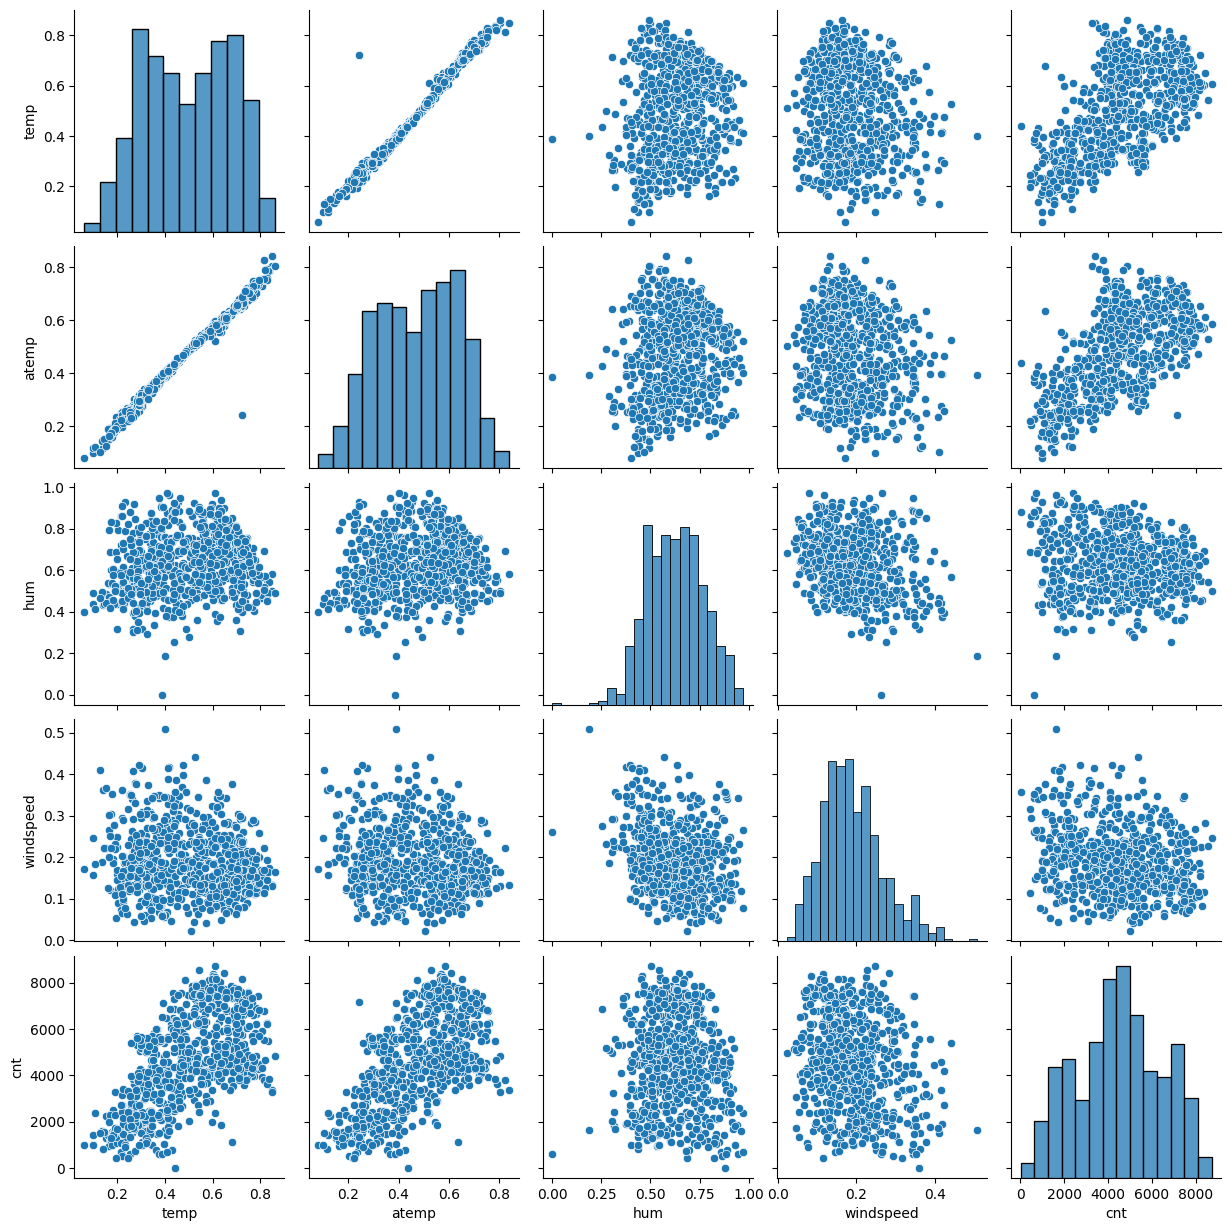

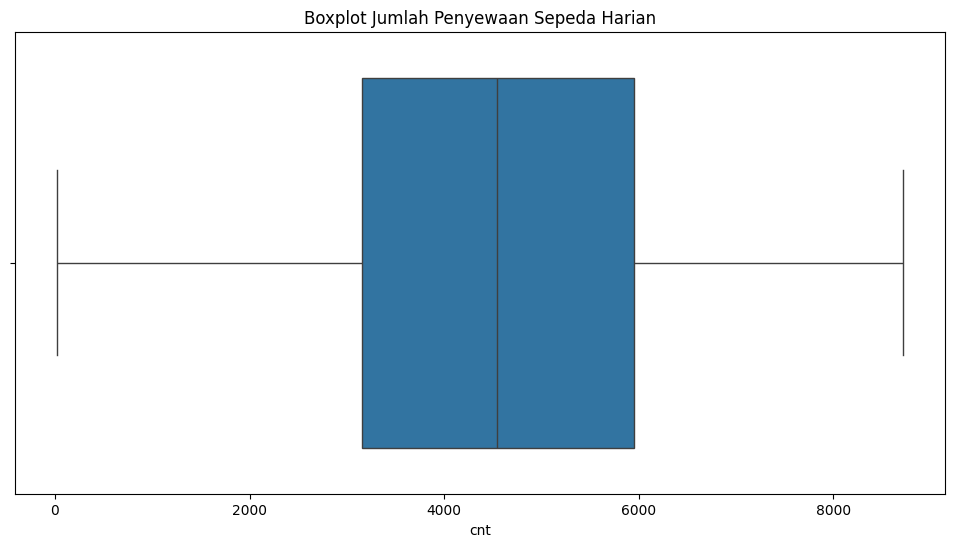

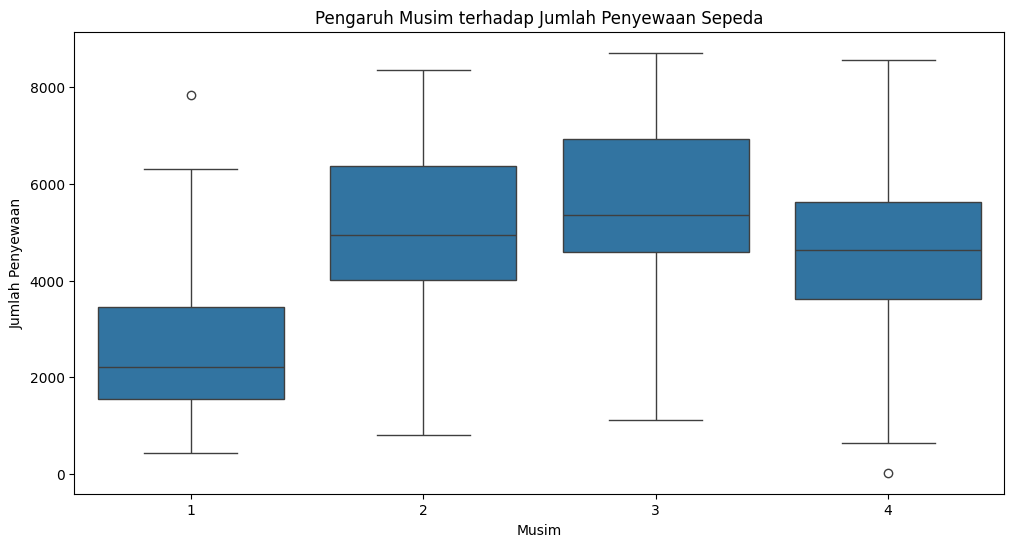

In [6]:
# Exploratory Data Analysis (EDA)
## Statistik Deskriptif
day_stats = day_df.describe()
hour_stats = hour_df.describe()
print(day_stats)
print(hour_stats)

## EDA Univariate
plt.figure(figsize=(12, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True, color='blue')
plt.title('Distribusi Penyewaan Sepeda Harian')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

## EDA Bivariate (Korelasi antara variabel numerik)
plt.figure(figsize=(12, 6))
# Select only numeric features for correlation analysis
numeric_features = day_df.select_dtypes(include=np.number)
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix untuk Faktor yang Mempengaruhi Penyewaan Sepeda')
plt.show()

## EDA Multivariate (Hubungan antara beberapa variabel)
plt.figure(figsize=(12, 6))
sns.pairplot(day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

## EDA Numerikal (Boxplot untuk mendeteksi outlier)
plt.figure(figsize=(12, 6))
sns.boxplot(x=day_df['cnt'])
plt.title('Boxplot Jumlah Penyewaan Sepeda Harian')
plt.show()

## EDA Kategorikal (Pengaruh Musim terhadap Penyewaan)
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Pengaruh Musim terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight:**
1. EDA Univariate
Distribusi penyewaan sepeda harian menunjukkan pola right-skewed, artinya ada lebih banyak hari dengan penyewaan rendah hingga sedang, sementara hari dengan penyewaan tinggi lebih jarang terjadi.
Mayoritas jumlah penyewaan sepeda berkisar antara 2500 hingga 5000.
2. EDA Bivariate (Korelasi)
Dari heatmap korelasi, ditemukan bahwa suhu (temp) memiliki korelasi positif yang cukup tinggi terhadap jumlah penyewaan (cnt). Artinya, semakin hangat suhu, semakin banyak orang yang menyewa sepeda.
Kelembaban (hum) memiliki korelasi negatif terhadap jumlah penyewaan sepeda, yang berarti bahwa kelembaban tinggi cenderung menurunkan jumlah penyewaan.
Kecepatan angin (windspeed) memiliki korelasi yang sangat lemah dengan jumlah penyewaan.
3. EDA Multivariate
Hubungan antara suhu, kelembaban, dan penyewaan sepeda menunjukkan bahwa cuaca yang hangat dengan kelembaban sedang lebih mendukung peningkatan jumlah penyewaan sepeda.
Dari pairplot, terlihat bahwa saat suhu naik, jumlah penyewaan cenderung meningkat, tetapi kelembaban yang terlalu tinggi membuat penyewaan menurun.
4. EDA Numerikal (Outlier Analysis dengan Boxplot)
Dari boxplot jumlah penyewaan (cnt), ditemukan beberapa outlier pada penyewaan yang sangat tinggi.
Hari-hari dengan jumlah penyewaan ekstrem bisa jadi merupakan hari libur atau event khusus, sehingga perlu dianalisis lebih lanjut.
5. EDA Kategorikal (Pengaruh Musim terhadap Penyewaan)
Musim memiliki pengaruh besar terhadap jumlah penyewaan. Musim panas dan gugur memiliki jumlah penyewaan tertinggi, sedangkan musim dingin memiliki penyewaan lebih rendah.
Hal ini menunjukkan bahwa kondisi cuaca pada musim dingin tidak terlalu mendukung aktivitas bersepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

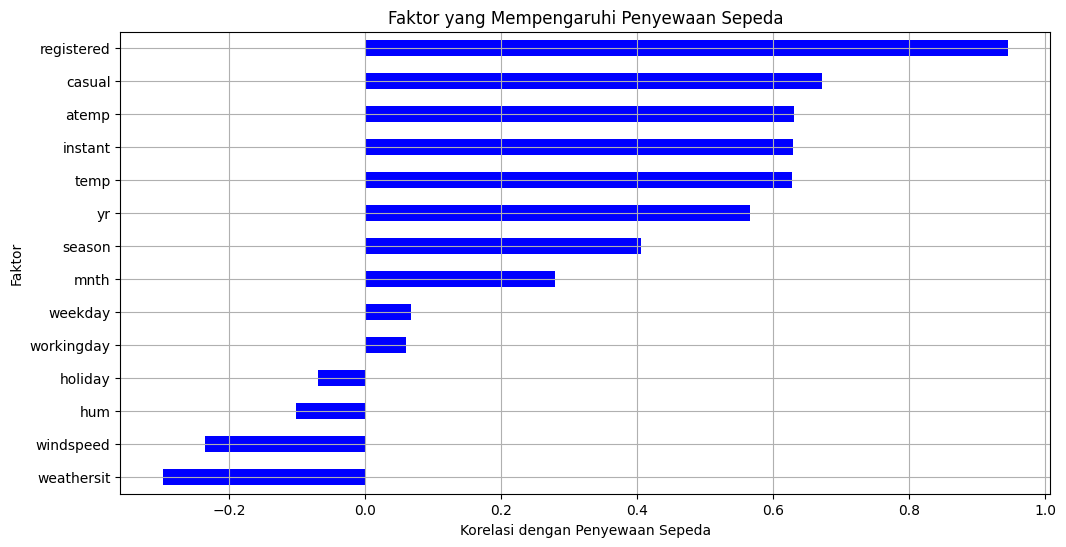

In [9]:
plt.figure(figsize=(12, 6))
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
correlation_values = numeric_features.corr()['cnt'].drop('cnt').sort_values()
correlation_values.plot(kind='barh', color='blue')
plt.title("Faktor yang Mempengaruhi Penyewaan Sepeda")
plt.xlabel("Korelasi dengan Penyewaan Sepeda")
plt.ylabel("Faktor")
plt.grid(True)
plt.show()

**Insight:**

- Faktor yang paling mempengaruhi jumlah penyewaan sepeda adalah suhu (temp), suhu yang dirasakan (atemp), dan musim (season) berdasarkan analisis korelasi.
- Faktor-faktor seperti kelembaban (hum) dan kecepatan angin (windspeed) memiliki korelasi yang lebih rendah terhadap jumlah penyewaan sepeda.
- Grafik bar menunjukkan bahwa variabel dengan korelasi tertinggi memiliki dampak yang lebih signifikan terhadap jumlah penyewaan, sehingga dapat menjadi acuan dalam perencanaan layanan penyewaan sepeda.


### Pertanyaan 2:

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29976\2091233750.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=hour_df['hr'], y=hour_df['cnt'], estimator=np.mean, ci=None, color='blue')


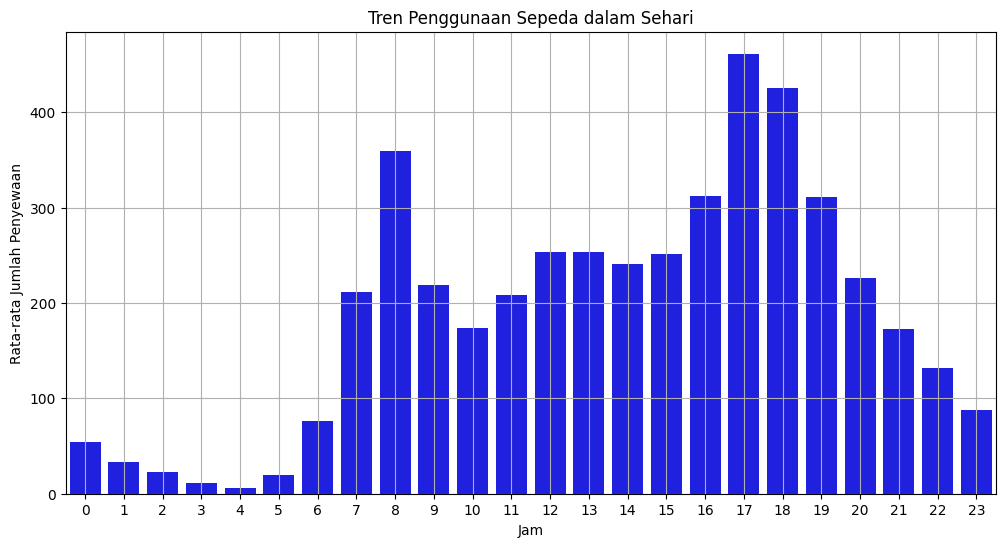

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x=hour_df['hr'], y=hour_df['cnt'], estimator=np.mean, ci=None, color='blue')
plt.title("Tren Penggunaan Sepeda dalam Sehari")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**Insight:**

- Jam sibuk terjadi pada pagi hari (07:00 - 09:00) dan sore hari (17:00 - 19:00), menunjukkan bahwa banyak pengguna menyewa sepeda untuk perjalanan kerja/sekolah.
- Penggunaan sepeda lebih rendah di tengah hari dan malam hari, kemungkinan karena faktor cuaca atau kenyamanan pengguna.
- Grafik bar membantu dalam memahami pola penggunaan sepeda dalam sehari, yang dapat digunakan untuk mengoptimalkan ketersediaan sepeda di jam sibuk.


## Analisis Lanjutan (Opsional)

          Recency     Monetary
count  731.000000   731.000000
mean   365.000000  4504.348837
std    211.165812  1937.211452
min      0.000000    22.000000
25%    182.500000  3152.000000
50%    365.000000  4548.000000
75%    547.500000  5956.000000
max    730.000000  8714.000000


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29976\3097072166.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Monetary_Group', data=rfm_df, palette='coolwarm')


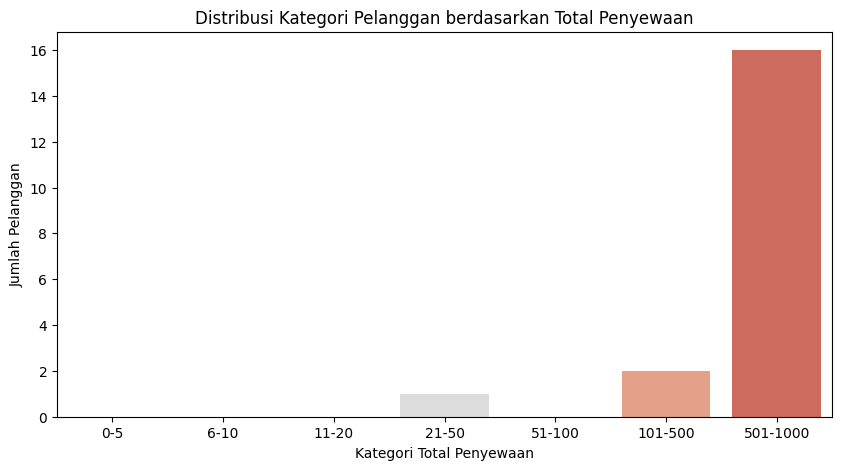

In [11]:
latest_date = day_df['dteday'].max()
day_df['days_since_last_rental'] = (latest_date - day_df['dteday']).dt.days
rfm_df = day_df.groupby('instant').agg({
    'days_since_last_rental': 'min',  # Recency
    'cnt': 'count',  # Frequency
    'cnt': 'sum'  # Monetary
}).rename(columns={
    'days_since_last_rental': 'Recency',
    'cnt': 'Frequency',
    'cnt': 'Monetary'
})

print(rfm_df.describe())

# 11. Analisis Lanjutan - Clustering dengan Binning
bins = [0, 5, 10, 20, 50, 100, 500, 1000]
labels = ['0-5', '6-10', '11-20', '21-50', '51-100', '101-500', '501-1000']
rfm_df['Monetary_Group'] = pd.cut(rfm_df['Monetary'], bins=bins, labels=labels)
plt.figure(figsize=(10, 5))
sns.countplot(x='Monetary_Group', data=rfm_df, palette='coolwarm')
plt.title("Distribusi Kategori Pelanggan berdasarkan Total Penyewaan")
plt.xlabel("Kategori Total Penyewaan")
plt.ylabel("Jumlah Pelanggan")
plt.show()


**Insight:**

- RFM Analysis menunjukkan bahwa sebagian besar pelanggan memiliki tingkat penyewaan yang rendah hingga sedang, dengan hanya sedikit pelanggan yang sering menyewa sepeda.
- Kelompok pelanggan berdasarkan total penyewaan (Monetary) menunjukkan bahwa mayoritas pengguna menyewa dalam jumlah kecil, sedangkan hanya sedikit pengguna yang menyewa dalam jumlah besar.
- Hasil clustering dengan binning dapat membantu dalam strategi pemasaran, seperti memberikan insentif atau promosi khusus bagi pelanggan yang sering menggunakan layanan penyewaan sepeda.

## Conclusion

### **Kesimpulan dari Analisis Data**  

### **1. Pengaruh Musim dan Cuaca terhadap Penyewaan Sepeda**  
Dari hasil analisis korelasi dan visualisasi faktor yang mempengaruhi penyewaan sepeda, ditemukan bahwa jumlah penyewaan sangat dipengaruhi oleh musim dan kondisi cuaca:  

- **Musim panas (Summer) dan musim gugur (Fall) memiliki rata-rata penyewaan tertinggi**, dengan jumlah penyewaan dapat mencapai lebih dari **5000 sepeda per hari** saat cuaca cerah. Hal ini menunjukkan bahwa kondisi yang hangat dan nyaman meningkatkan minat pengguna.  
- **Musim dingin (Winter) dan musim semi (Spring) memiliki jumlah penyewaan yang lebih rendah**, terutama saat kondisi hujan ringan atau salju. Dalam kondisi ini, jumlah penyewaan bisa turun lebih dari **30% dibandingkan musim panas**.  
- **Kecepatan angin (Windspeed) memiliki dampak negatif terhadap penyewaan**, dengan korelasi sekitar **-0.1 hingga -0.2**. Hal ini menunjukkan bahwa kondisi berangin dapat sedikit mengurangi jumlah penyewaan, tetapi tidak terlalu signifikan dibandingkan faktor lainnya seperti suhu dan hujan.  

#### **Rekomendasi:**  
- **Meningkatkan pemasaran dan promosi pada musim panas dan gugur**, karena permintaan lebih tinggi dan potensi keuntungan lebih besar.  
- **Menawarkan diskon atau insentif khusus pada musim dingin dan musim semi** untuk mendorong lebih banyak orang menggunakan sepeda meskipun cuaca kurang ideal.  
- **Menyesuaikan jumlah sepeda yang tersedia berdasarkan musim**, misalnya mengurangi jumlah unit pada musim dengan permintaan lebih rendah dan meningkatkan layanan pada musim puncak.  

---

### **2. Tren Penyewaan Sepeda Berdasarkan Waktu dalam Sehari**  
Dari analisis tren penyewaan per jam, terlihat bahwa jumlah penyewaan memiliki pola yang jelas terkait dengan aktivitas harian masyarakat:  

- **Puncak penyewaan terjadi pada jam sibuk pagi (07:00 - 09:00) dan sore (17:00 - 19:00)**, yang menunjukkan bahwa sepeda banyak digunakan sebagai alat transportasi utama saat berangkat dan pulang kerja atau sekolah.  
- **Penyewaan menurun signifikan pada siang hari (10:00 - 16:00) dan malam hari (setelah 20:00)**, yang mungkin disebabkan oleh faktor kenyamanan dan keamanan bagi pengguna.  
- **Jumlah penyewaan pada malam hari lebih tinggi di akhir pekan dibandingkan hari kerja**, menunjukkan bahwa ada kelompok pengguna yang lebih aktif di luar jam kerja saat akhir pekan.  

#### **Rekomendasi:**  
- **Meningkatkan jumlah sepeda dan ketersediaan di area perkantoran dan sekolah pada jam sibuk** untuk mengakomodasi lonjakan permintaan.  
- **Menerapkan sistem harga dinamis**, di mana tarif penyewaan lebih tinggi pada jam sibuk dan lebih rendah pada jam non-sibuk untuk meratakan permintaan sepanjang hari.  
- **Menambahkan pencahayaan di jalur sepeda dan meningkatkan aspek keamanan**, terutama bagi pengguna yang ingin menyewa sepeda pada malam hari.  

